In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df=pd.read_csv("D:/인공지능개론/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [5]:
label_encoders = LabelEncoder()
columns = ['Sex']

for column in columns:
    df[column] = label_encoders.fit_transform(df[column])

df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [9]:
#데이터 분할
X=df.drop(columns=['Rings'])
y=df['Rings']
Y=pd.get_dummies(y).values
X_train, X_test, y_train, y_test=train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=52)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

X=X.values

(3341, 8) (3341,)
(836, 8) (836,)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │              90 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 751 (2.93 KB)

 Trainable params: 751 (2.93 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.1)
y_pred = model.predict(X_test)

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 95.5792 - mse: 95.5792 - val_loss: 37.8685 - val_mse: 37.8685
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 20.8002 - mse: 20.8002 - val_loss: 11.1460 - val_mse: 11.1460
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.6012 - mse: 8.6012 - val_loss: 9.4324 - val_mse: 9.4324
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8.7426 - mse: 8.7426 - val_loss: 8.6518 - val_mse: 8.6518
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.0673 - mse: 8.0673 - val_loss: 8.2134 - val_mse: 8.2134
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.3227 - mse: 7.3227 - val_loss: 7.9011 - val_mse: 7.9011
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7.6772 - mse: 7.6772 - val_loss: 7.7965 - val_mse: 7.7965
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.4887 - mse: 7.4887 - val_loss: 7.6355 - val_mse: 7.6355
Epoch 9/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 7.201

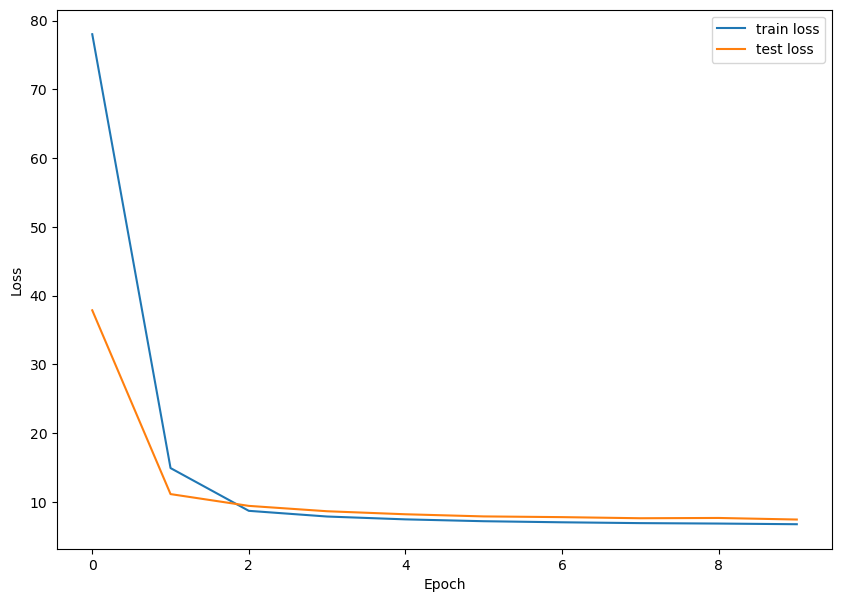

In [13]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4970 - mse: 7.4970


[6.54417610168457, 6.54417610168457]